# Примеры ДПФ

### Предварительные сведения

Рассмотрим сначала методы для импорта и генерации сигналов в `Python`. Для отображения графиков сигналов потребуются методы библиотеки `matplotlib`. Также потребуется стандартная библиотека `numpy`.

In [158]:
import numpy as np
import matplotlib.pyplot as plt

Функция `np.linspace(start, stop, num)` создаёт вектор равномерно расположенных значений в диапазоне `[start, stop]`, а `num` - количество точек в диапазоне.
Далее, с помощью любых математических функций и их комбинаций можно генерировать сигнал.
Например, сгенерируем синусоиду функцией `np.sin()`. 

Различные функции matplotlib задают различный стиль отображения:

    - plot() - стандартный график
    - stem() - график в виде отсчетов для дискретных сигналов
    - step() - график в виде уровней.


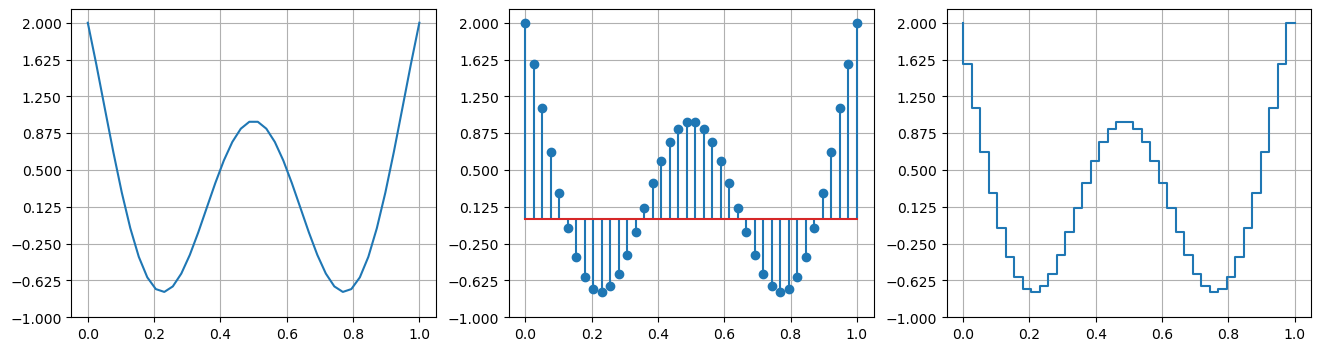

In [5]:
n = 40
t = np.linspace(0, 1, n, endpoint=True)
x = np.sin(np.pi*t) + 2*np.cos(2*np.pi*t) - 2*np.sin(3*np.pi*t)

plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.plot(t, x)
plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
plt.grid(True)

plt.subplot(1, 3, 2)
plt.stem(t, x)
plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
plt.grid(True)

plt.subplot(1, 3, 3)
plt.step(t, x)
plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
plt.grid(True)

Основной библиотекой для работы с сигналами и их обработки будет библиотека `scipy` и её отдельные расширения.
Импортируем звуковой файл и построим его график.

In [8]:
from scipy.io import wavfile

samplerate, data = wavfile.read('source/LetsGo.wav')

C:\Users\AlexK\AppData\Local\Temp\ipykernel_7228\1500797975.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('source/LetsGo.wav')


In [10]:
samplerate

44100

In [14]:
length = data.shape[0] / samplerate
print(f"Длительность = {length}сек")

Длительность = 3.571950113378685сек


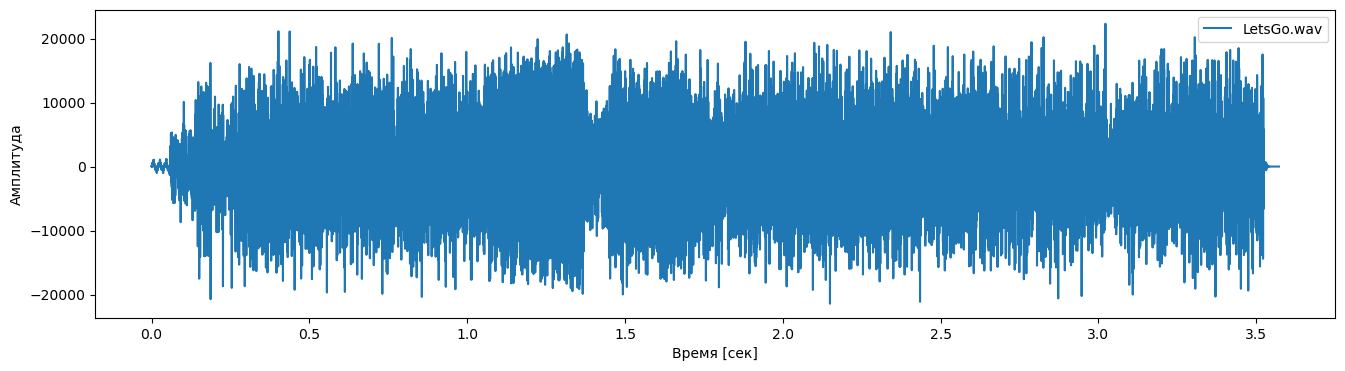

In [16]:
time = np.linspace(0., length, data.shape[0])
plt.figure(figsize=(16, 4))
plt.plot(time, data, label="LetsGo.wav")
plt.legend()
plt.xlabel("Время [сек]")
plt.ylabel("Амплитуда");

Для воспроизведения аудио в рамках ipynb-ноутбука удобно воспользоваться библиотекой `IPython`.

In [8]:
import IPython
IPython.display.Audio(data,rate=samplerate)

### ДПФ

Для вычисления ДПФ используем пакет `fftpack` в библиотеке `scipy`, который содержит основные функции для вычисления ДПФ по быстрым алгоритмам.

    fft() - вычисление ДПФ
    ifft() - вычисление обратного ДПФ
    fftshift() - применяется к вектору спектра и циклически сдвигает его, так чтобы спектральный отсчёт для нулевой 
    частоте был в центре

Сгенерируем сигнал, вычислим ДПФ, выведем графики амплитуда и фазы спектра.

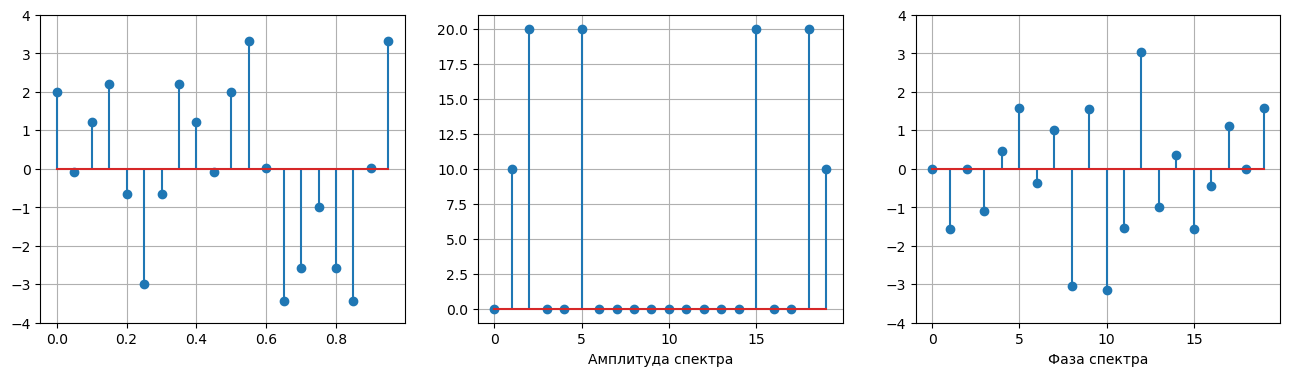

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, rfft, fftfreq

# сформируем 20 временных отсчётов от 0 до 1 (не включая)
n = 20
t = np.linspace(0, 1, n, endpoint=False)
x = np.sin(2*np.pi*t) + 2*np.cos(2*np.pi*2*t) - 2*np.sin(2*np.pi*5*t)
# для демонстрации эффекта растекания спектра, можно использовать сигнал ниже
#x = 2*np.cos(2*np.pi*2.5*t)

xFFT = fft(x)
# Амплитуда спектра
xA = np.abs(xFFT)
# Фаза спектра
xF = np.angle(xFFT)

fig = plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
plt.stem(t, x)
plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
plt.grid(True)

plt.subplot(1, 3, 2)
plt.stem(xA)
plt.yticks(np.linspace(0, np.ceil(np.max(xA)), 9))
plt.grid(True)
plt.xlabel('Амплитуда спектра')

plt.subplot(1, 3, 3)
plt.stem(xF)
plt.yticks(np.linspace(np.floor(np.min(xF)), np.ceil(np.max(xF)), 9))
plt.grid(True)
plt.xlabel('Фаза спектра');

Как видно 3 синусоиды на входе точно были отражены на графике амплитуды спектра. 

Если раскомментировать строчку
    `x = 2*np.cos(2*np.pi*2.5*t)`
то можно увидеть эффект растекания спектра. 

Если сигнал состоит из линейной комбинации базовых частот в ${\mathbb C}^N$, то эти частоты будут точно отражены в спектре. Это частоты вида $\{e^{-2 \pi i m \frac{n}{N}} \}_{n=0,...,N-1}$, где $m$ целое число. В ином случае сигнал вида $\{e^{-2 \pi i \omega \frac{n}{N}} \}_{n=0,...,N-1}$, где $\omega$ - это не целое число, будет содержать вклад каждого спектрального отсчёта.

Расммотрим ещё один пример. Графики выведем с учётом следующих соображений:
1. Графики сигнала и его спектра будем отображать с помощью `plt.plot()` (то есть как график обычной функции, но надо помнить о том, что это всё дискретные сигналы).
2. При отображении графиков спектральных отсчётов нулевую частоту будем изображать в центре с помощью метода `fftshift()`, а шкалу по оси Ox будем откладывать в нормализованных частотах.

Отобразим также вещественную и мнимую части спектра. 

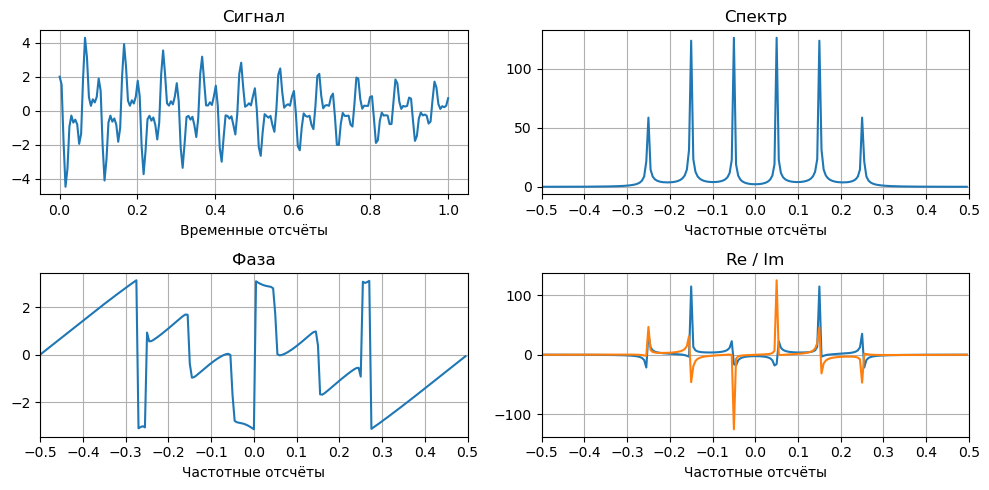

In [176]:
n = 200
t = np.linspace(0, 1, n, endpoint=True)
x = (np.sin(2*np.pi*50*t) + 2*np.cos(2*np.pi*30*t) - 2*np.sin(2*np.pi*10*t))*np.exp(-t)

N = len(x)

xFFT = fftshift(fft(x, N))
# Амплитуда спектра
xA = np.abs(xFFT)
# Фаза спектра
xF = np.angle(xFFT)

xRe = np.real(xFFT)
xIm = np.imag(xFFT)

xList = [x, xA, xF, np.array([xRe, xIm]).T]
titles = ['Сигнал', 'Спектр', 'Фаза', 'Re / Im']

    # Графики
plt.figure(figsize=(10, 5))
for i, sig in enumerate(xList):
    plt.subplot(2, 2, i+1)
    plt.title(titles[i])
    if i == 0:
        plt.plot(t, sig)
        plt.xlabel('Временные отсчёты')
            #plt.xlim([-0.25, len(x)-0.75])
    else:
        plt.plot(np.arange(-np.floor(N/2), np.floor((N+1)/2))/N,sig)
        plt.xlabel('Частотные отсчёты')
        plt.xlim([-0.5, 0.5])
        plt.xticks(np.linspace(-0.5, 0.5, 11))
    plt.grid()
plt.tight_layout()

Для удобства напишем функцию для визуализации сигнала и его амплитуды спектра. Функция будем основана на коде выше, однако добавим дополнительные возможности. 
1. Выводить будет только половину спектральных отсчётов амплитуды спектра (сигнал вещественны и вторая половина равна первой по симметрии).
2. Для сигналов с малым числом отсчётов будем использовать zero-padding (дополнение сигнала нулями), чтобы увеличить число отсчётов в спектре. На информацию в спектре это не влияет, но графики спектра будут более сглаженными. Для этого можно использовать второй аргумент у метода `fft`, указав желаемое число спектральных отсчётов.
3. Добавим возможность отображать реальные частоты.
4. Также добавим возможность отсекать при отображении высокие частоты.

In [146]:
# вычисление нормализованных частот 
N = 100 # длина сигнала
ts = 0.01 # период дискретизации
fftshift(fftfreq(100, d = ts))

array([-50., -49., -48., -47., -46., -45., -44., -43., -42., -41., -40.,
       -39., -38., -37., -36., -35., -34., -33., -32., -31., -30., -29.,
       -28., -27., -26., -25., -24., -23., -22., -21., -20., -19., -18.,
       -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,
        -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,
         5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
        27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,
        38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
        49.])

In [186]:
def myDFT_AmplPlot(t, x, N=512, fs = None, xLim = 0.5):    
    if len(x)>512:
        N = len(x)
        
    xFFT = fftshift(fft(x, N))
    # Амплитуда спектра
    xA = np.abs(xFFT)
    
    if fs == None:
        fs = 1    
    freqs = fftshift(fftfreq(N, d = 1/fs))
    # Графики
    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    plt.title('Сигнал')
    plt.plot(t, x)
    plt.xlabel('Временные отсчёты')

    plt.subplot(1, 2, 2)
    plt.plot(freqs,xA)
    plt.xlabel('Частоты')
    plt.xlim([0, fs*xLim])
    plt.xticks(np.linspace(0, fs*xLim, 11))
    plt.grid()
    plt.tight_layout()

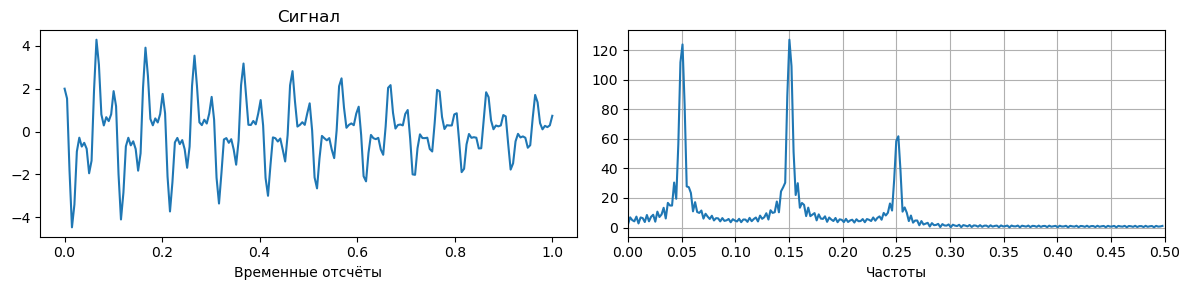

In [188]:
n = 200
t = np.linspace(0, 1, n, endpoint=True)
x = (np.sin(2*np.pi*50*t) + 2*np.cos(2*np.pi*30*t) - 2*np.sin(2*np.pi*10*t))*np.exp(-t)

myDFT_AmplPlot(t, x)

C:\Users\AlexK\AppData\Local\Temp\ipykernel_7228\923799402.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate, data = wavfile.read('source/LetsGo.wav')


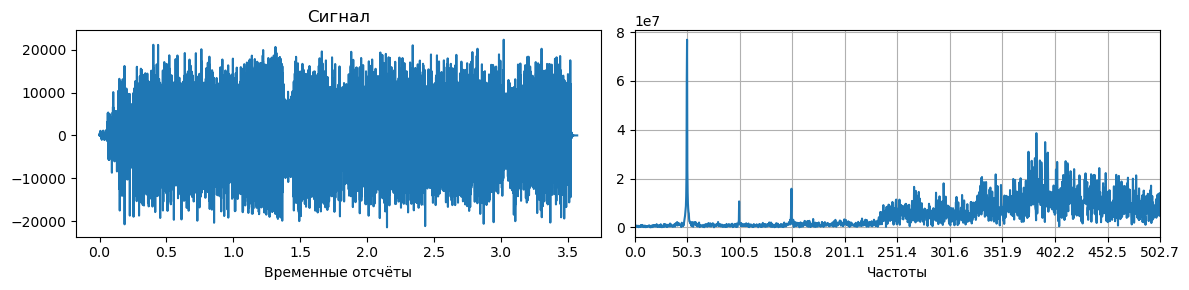

In [190]:
from scipy.io import wavfile

samplerate, data = wavfile.read('source/LetsGo.wav')
time = np.linspace(0., length, data.shape[0])

myDFT_AmplPlot(time, data, fs = samplerate, xLim=0.0114)

### Пример: очистка сигнала от шума

Для некоторых типов сигналов  ДПФ позволяет очень эффективно удалять шумы. Например, таким сигналом является зашумлённая линейная комбинация синусоид
$$
f(x) = sin(2\pi \omega_1 x) + sin(2\pi \omega_2 x),
$$
где $\omega_1 = 50$, $\omega_2 = 120.$  Добавим также значительный шумовой сигнал, а именно гуассов белый шум.

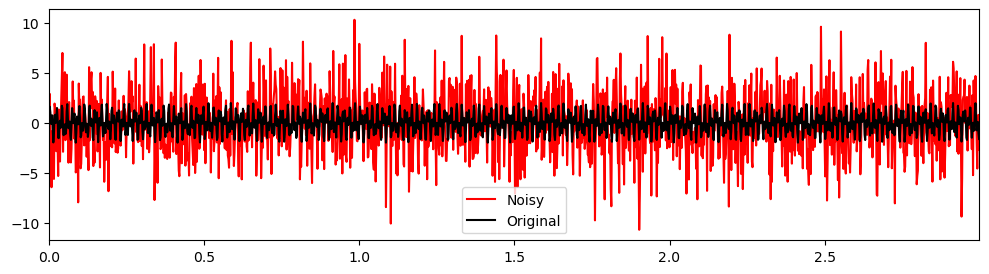

In [192]:
import numpy as np
import matplotlib.pyplot as plt

fs = 512
T = 3
N = np.int32(fs * T)

t = np.linspace(0,T,N,endpoint=False)
sig_orig = np.sin(2*np.pi*55*t) + np.sin(2*np.pi*125*t)
sig_noise = sig_orig + 3*np.random.randn(len(t))

plt.figure(figsize=(12, 3))
plt.plot(t, sig_noise, color='r', label = 'Noisy')
plt.plot(t, sig_orig, color='k', label = 'Original')
plt.xlim(t[0],t[-1])
plt.legend()

В данном случае в зашумлённом сигнале во временной области визуально обнаружить какой либо полезный сигнал проблематично. 

Построим график спектра сигнала. Каждый спектральный отсчёт отвечает за то, насколько велик вклад соответствующей синусоиды в сигнал. Из графика ясно, что сигнал состоит из шума и двух гармонических колебаний на частотах 55 и 125 Гц.

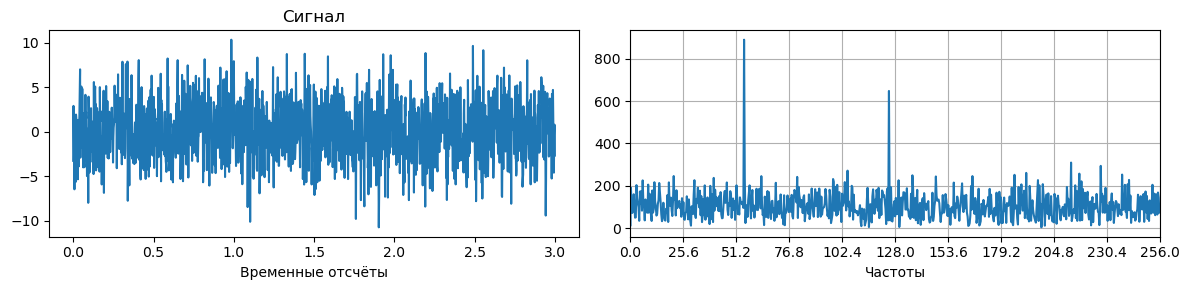

In [194]:
from scipy.fftpack import fft, ifft, fftshift

myDFT_AmplPlot(t,sig_noise, fs = fs)

Отделим эти частоты от шума. Для этого занулим в спектре те частоты, значение спектра в которых меньше 400. После обратного ДПФ получим очищенный от шума сигнал.

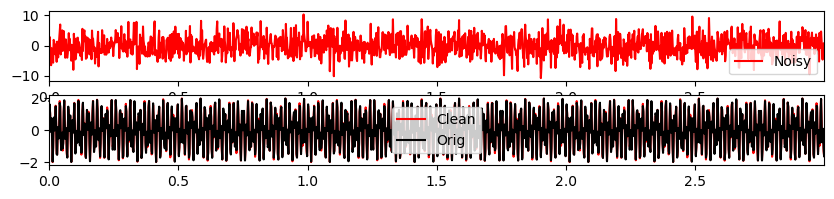

In [196]:
n=len(t)
sigF = fft(sig_noise,n)
sigFA = np.abs(sigF)
ind = sigFA > 400
sigF_clean = sigF * ind
sig_clean = np.real(ifft(sigF_clean))

plt.figure(figsize=(10, 2))
plt.subplot(2,1,1)
plt.plot(t, sig_noise, color='r', label = 'Noisy')
plt.xlim(t[0],t[-1])
plt.legend()

plt.subplot(2,1,2)
plt.plot(t, sig_clean, color='r', label = 'Clean')
plt.plot(t, sig_orig, color='k', label = 'Orig')
plt.xlim(t[0],t[-1])
plt.legend()

Для оценки "величины" шума в сигнале используется такая метрика как SNR (signal-to-noise ratio). Напишем специальную функцию для её вычисления. 

In [170]:
def mySNR(sig,noise):
    return 10*np.log10(np.sum(np.abs(sig)**2)/np.sum(np.abs(noise)**2))

Сравним SNR до и после очистки от шума:

In [172]:
print("SNR в зашумлённом сигнале:", mySNR(sig_orig,sig_noise-sig_orig))
print("SNR в очищенном сигнале:", mySNR(sig_orig,sig_clean-sig_orig))

SNR в зашумлённом сигнале: -9.665676476653884
SNR в очищенном сигнале: 21.607718055433608


#### Задача

Для некоторых типов сигналов  ДПФ позволяет очень эффективно удалять шумы. Например, таким сигналом является зашумлённая линейная комбинация синусоид.

Пусть у нас есть сигнал `CryptedFreq.npy`. Известно, что это линейная комбинация синусоид с целыми частотами, сигнал получен с частотой дискретизации 512 Гц, сигнал зашумлён.
Загрузить сигнал можно следующим образом:

In [26]:
import numpy as np

with open('source/CryptedFreq.npy', 'rb') as f:
    sigCoded = np.load(f)

Требуется найти содержащиеся в нём синусоиды.

### Пример: DTMF технология



In [213]:
from scipy.fftpack import fft, ifft, fftshift
import numpy as np
import matplotlib.pyplot as plt

keys = ['1','2','3','4','5','6','7','8','9','*','0','#']
rowTones = np.array([697, 770, 852, 941]);
colTones = np.array([1209, 1336, 1477]);
fs = 8000
ts = 1/8000

phoneNumber = '89057428569'
phoneNumber = list(phoneNumber)
phoneNumber

['8', '9', '0', '5', '7', '4', '2', '8', '5', '6', '9']

In [215]:
def encode(phoneNumber):
    y = [0]
    for char in phoneNumber:
        try :
            i = keys.index(char)
        except ValueError as e:
            print(e)
            continue
        ind1 = rowTones[(i)//3] #row
        ind2 = colTones[(i)%3] #column
        #print(ind1,',',ind2)
        # длительность нажатия
        dur1=0.3
        dur1=0.3 + 0.2*np.random.uniform(-1/2,1/2);
        # длительность тишины
        dur2=0.15
        dur2=0.15 + 0.1*np.random.uniform(-1/2,1/2);

        t = np.arange(0,dur1,ts)
        sig = np.sin(2*np.pi*ind1*t) + np.sin(2*np.pi*ind2*t)    
        n = int(dur2*fs)

        y = y + list(sig) + [0] * n
    
    y_orig = y
    y = np.array(y) + 0.5 * np.random.randn(len(y))
    print('SNR: ', mySNR(y_orig, y))
    return y

SNR:  -1.3964835063324044


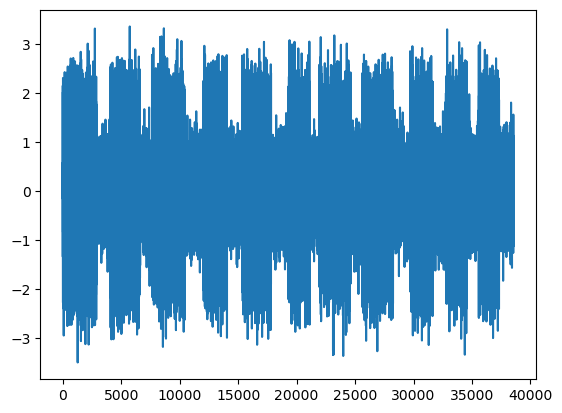

In [217]:
y = encode(phoneNumber)
plt.plot(y)

In [219]:
import IPython
IPython.display.Audio(y,rate=fs)

### Задача

Есть 10 Wav-файлов, каждый из которых содержит зашумлённый сигнал с закодированным с помощью DTMF-технологии номером мобильного.

Требуется декодировать эти сигналы и получить 10 телефонных номеров.

In [ ]:
for i in range(10):
    fs, sig = wavfile.read('source\signals\phoneNumber'+str(i)+'.wav')
    #### декодировать сигнал sig ####

# О частотном разрешении ДПФ

Частотное разрешение ДПФ - это наименьшее расстояние между частотами, которые можно различить с помощью ДПФ.
Рассмотрим следующий пример с двумя синусоидами на частотах 23 и 24 Гц и с равными амплитудами, частота дискретизации равна 99 Гц.

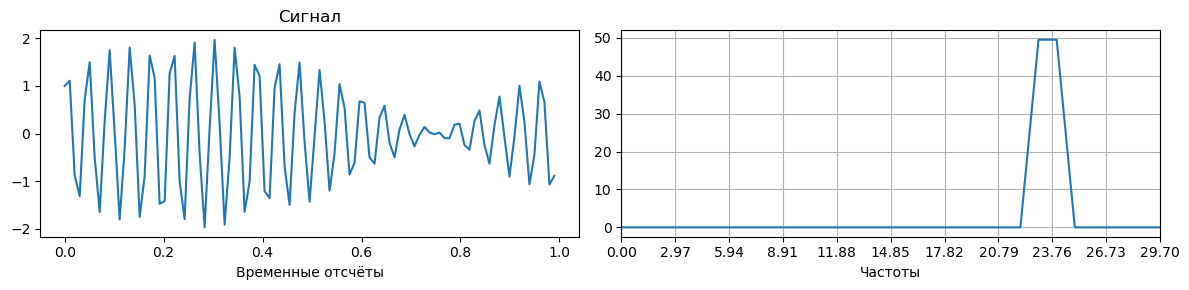

In [201]:
import numpy as np 
from scipy.fftpack import fft, ifft, fftshift
import matplotlib.pyplot as plt

n = 99
t = np.linspace(0, 1, n, endpoint=False)
x = np.sin(2*np.pi*24*t) + np.cos(2*np.pi*23*t) 
myDFT_AmplPlot(t, x, N=99, fs = 99, xLim = 0.3)

Число точек в спектре равно число отсчётов в сигнале. 
На получившемся спектре отмечено 2 высоких по амплитуде спектральных отсчёта. Однако, из этого графика не ясно, одна ли это частота, с истинным значение между получившимися отсчётами или 2 частоты.

Несколько лучшую картинку может дать ДПФ с большим числом спектральных отсчётов, то есть произведём zero-padding сигнала и проделаем его ДПФ, для этого изменим параметр `N` в методе `myDFT_AmplPlot`.

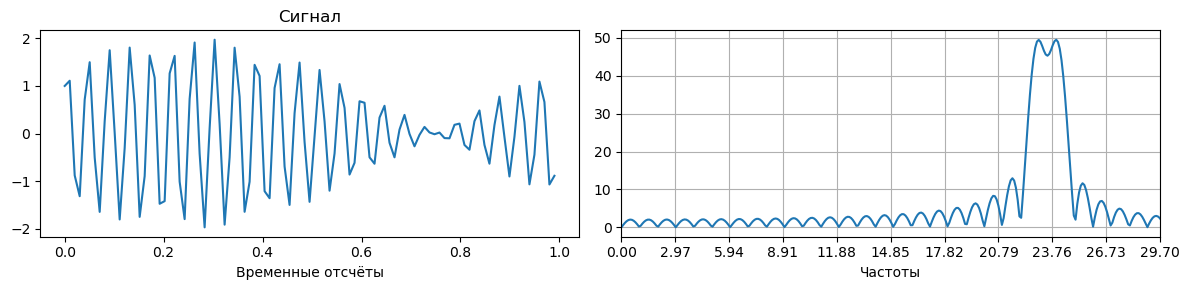

In [203]:
myDFT_AmplPlot(t, x, N=1024, fs = 99, xLim = 0.3)

Здесь отдельные вершины уже можно различить. Однако, если частоты находятся ещё ближе, то их различить по ДПФ мы уже не сможем. Рассмотрим синусоиды на частотах 23 и 23.9 Гц.

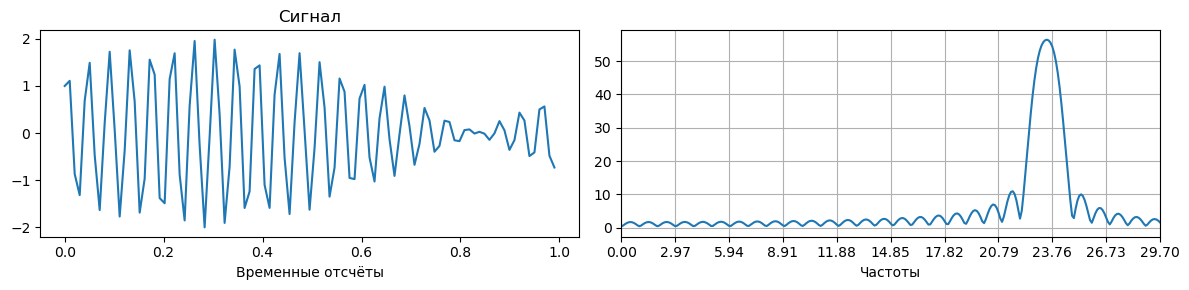

In [205]:
x = np.sin(2*np.pi*23.9*t) + np.cos(2*np.pi*23*t) 
myDFT_AmplPlot(t, x, N=1000, fs = 99, xLim = 0.3)

Таким образом, частотное разрешение ДПФ можно считать приблизительно равным $fs /n$, где $n$ длина исходного сигнала, $fs$ частота его дискретизации. В нашем случае $fs /n = 99/100 = 0.99$ Гц.

Важно отметить, что zero-padding не повышает частотное разрешение и не добавляет какой-то новой частотной информации, как может показаться. Zero-padding позволяет лишь детальнее прорисовать имеющуюся информацию (это будет ясно, если установить связь ДПФ и ДВПФ).

Улучшить частотное разрешение можно увеличением длины сигнала $n$. Например, добавим ещё 0.5 секунды к сигналу выше. Тогда ранее неразличимые частоты будут различимы.

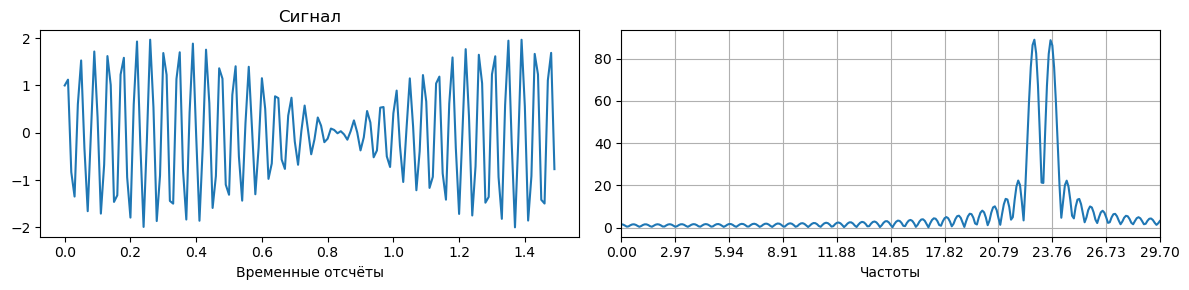

In [207]:
n = 150
t = np.linspace(0, 1.5, n, endpoint=False)
x = np.sin(2*np.pi*23.9*t) + np.cos(2*np.pi*23*t) 
myDFT_AmplPlot(t, x, N=1000, fs = 99, xLim = 0.3)

Надо также отметить, что мы обсуждали различимость частот с одинаковыми амплитудами. Если амплитуды различны, то частота с большей амплитудой будет маскировать близкую частоту с малой амплитудой.

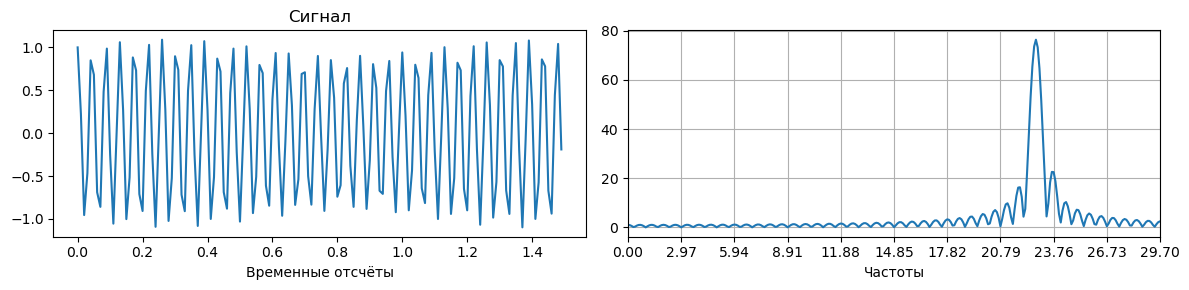

In [209]:
n = 150
t = np.linspace(0, 1.5, n, endpoint=False)
x = 0.1*np.sin(2*np.pi*23.9*t) + np.cos(2*np.pi*23*t) 
myDFT_AmplPlot(t, x, N=1000, fs = 99, xLim = 0.3)

### Вид матрицы ДПФ

Выведем график вещественной части значений матрицы ДПФ для $n=256$. Значения будут отмечаться цветом.

В этом графике видна иерархичность и симметричность значений. По сути каждая строка является дискретизацией косинуса с увеличивающейся частотой.

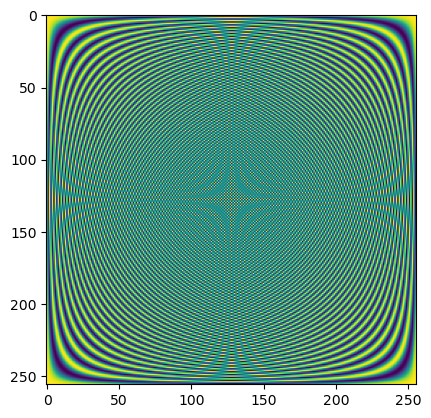

In [211]:
import numpy as np
import matplotlib.pyplot as plt


n = 256
w = np.exp(-1j * 2 * np.pi / n)

J,K = np.meshgrid(np.arange(n),np.arange(n))
DFT = np.power(w,J*K)
DFT = np.real(DFT)
       
plt.imshow(DFT)